# CHANDAN KUMAR SINGH

# Data Science and Business Analytics Intern

### Task: Prediction using Supervised ML

#### Predict the percentage of an student based on the no. of study hours.
#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [49]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
%matplotlib inline

In [7]:
#importing the dataset.

data=pd.read_csv("study_hours.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


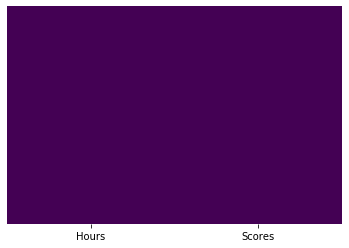

In [10]:
#checking for the missing values in the data set

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
#return type of hours is in float format

#return type of scores is in integer format

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
#getting the overall information for the given data set

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


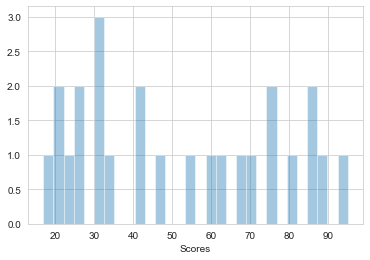

In [14]:
#Exploratory Data Analysis


sns.set_style('whitegrid')

sns.distplot(data['Scores'],kde=False,bins=30)

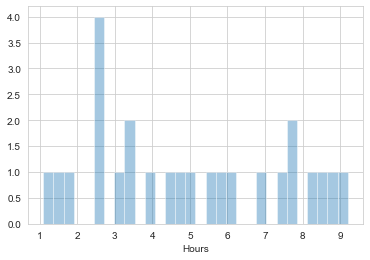

In [15]:
sns.set_style('whitegrid')

sns.distplot(data['Hours'],kde=False,bins=30)

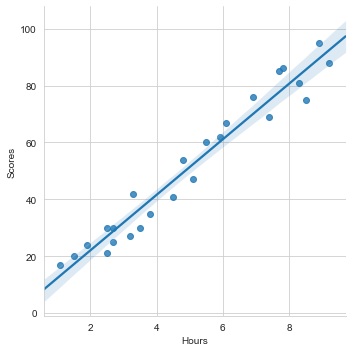

In [17]:
sns.lmplot(x='Hours',y='Scores',data=data)

# Model prepration

In [26]:
#Assigning the dependent and independent variable.

x1 = data.iloc[:, :-1].values  
y1 = data.iloc[:, 1].values 

X=x1.reshape(-1,1)

y=y1.reshape(-1,1)

In [27]:
#Dividing the test and train values in 30:70 size respectively.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101) 

In [31]:
#Now we will create and train the model

from sklearn.linear_model import LinearRegression

#creating the model

lm = LinearRegression()

#now we will train the created model on the traing set

lm.fit(X_train,y_train)

print("Training complete.")

Training complete.


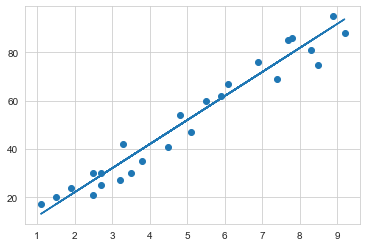

In [33]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predicting the values

In [37]:
#Predicting Test Data

predictions = lm.predict(X_test)

#scores for the given study hours

In [38]:
predictions

array([[27.01878177],
       [78.84466226],
       [39.97525189],
       [75.85470762],
       [56.91832821],
       [49.94176737],
       [33.99534261],
       [86.81787465]])

Text(0, 0.5, 'PREDICTED Y')

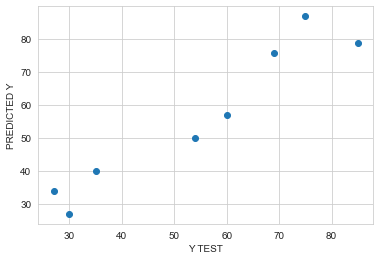

In [40]:
#Actual test value vs the predicted value

plt.scatter(y_test,predictions)
plt.xlabel('Y TEST')
plt.ylabel('PREDICTED Y')

#Y TEST is the real test value.

# Evaluation

In [41]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


In [44]:
#varience of the model


metrics.explained_variance_score(y_test,predictions)

0.9076652194870971

# Answer

In [48]:
# if he studies 9.25 hours a day what will be the score.

hours=np.array(9.25)

hours=hours.reshape(-1,1)

answer = lm.predict(hours)

print(answer)

[[94.29276126]]
